In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

print("Project root added to sys.path")


Project root added to sys.path


In [2]:
from clients.aggregators import avg_aggregate, weighted_aggregate
from clients.federated_client import FederatedClient
from clients.federated_training import federated_training
from models.model import get_tinyprop_model
from utils.data_loader import load_dataset
from utils.data_partition import iid_partition, non_iid_partition, dirichlet_partition, quantity_skew_partition, temporal_partition, hybrid_partition
from utils.performance_visualizations import plot_fed_metrics, plot_all_strategies

print("Custom modules imported successfully.")


c:\Users\la7tim\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Custom modules imported successfully.


In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

trainset, testset = load_dataset("fashionmnist", root="./data")



Using device: cpu
[INFO] Loaded dataset 'fashionmnist' with 60000 training samples and 10000 testing samples.


In [4]:
trainset, testset = load_dataset("fashionmnist")

[INFO] Loaded dataset 'fashionmnist' with 60000 training samples and 10000 testing samples.


In [ ]:
num_clients = 5

partitions = {
    "iid":            iid_partition(trainset, num_clients),
    "non_iid":        non_iid_partition(trainset, num_clients=num_clients, num_shards=10),
    "dirichlet":      dirichlet_partition(trainset, num_clients=num_clients, alpha=0.5),
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

print(f"We have {len(partitions)} partition strategies ready.")


In [5]:
partitions = {
    "iid":            iid_partition(trainset, num_clients),
    "non_iid":        non_iid_partition(trainset, num_clients=num_clients, num_shards=10),
    "dirichlet":      dirichlet_partition(trainset, num_clients=num_clients, alpha=0.5),
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

print("Partitions created:", list(partitions.keys()))

Partitions created: ['iid', 'non_iid', 'dirichlet', 'quantity_skew', 'temporal', 'hybrid']


In [6]:
num_clients = 5
from models.tinyProp import TinyPropParams
tp_params = TinyPropParams(S_min=0.05, S_max=0.5, zeta=0.25, number_of_layers=2)

all_results = {}

In [7]:
for strategy, subsets in partitions.items():
    print(f"\n=== Federated Training with {strategy.upper()} partitions ===")

    global_model, acc_list, flops_list, mem_list, comm_list, sparsity_list = federated_training(
        client_datasets=subsets,
        model_name="fashionmnist",
        testset=testset,
        tinyprop_params=tp_params,
        aggregator_fn=avg_aggregate,
        aggregator_kwargs=None,
        rounds=100,  
        device=device,
        local_epochs=1,
        early_stopping_patience=5  
    )

    final_acc     = acc_list[-1]          if acc_list      else 0
    final_flops   = flops_list[-1]        if flops_list    else 0
    final_mem     = mem_list[-1]          if mem_list      else 0
    final_comm    = comm_list[-1]         if comm_list     else 0
    final_spars   = sparsity_list[-1]     if sparsity_list else 0

    print(f"[{strategy.upper()}] Final Accuracy: {final_acc:.4f}")
    print(f"[{strategy.upper()}] Final FLOPs:    {final_flops:.2f}")
    print(f"[{strategy.upper()}] Final Memory:   {final_mem:.2f} bytes")
    print(f"[{strategy.upper()}] Final Comm:     {final_comm:.2f} bytes")
    print(f"[{strategy.upper()}] Final Sparsity: {final_spars*100:.2f}%")

    all_results[strategy] = {
        "acc": acc_list,
        "flops": flops_list,
        "mem": mem_list,
        "comm": comm_list,
        "sparsity": sparsity_list
    }

print("\nDone!\n")



=== Federated Training with IID partitions ===

Round 1/100
Test Accuracy: 0.4802
[Compute] round_flops=386169687.67, [Mem] peak=5155724.0 bytes, [Comm] 2511227496.0 bytes, [Sparsity] 20.60%

Round 2/100
Test Accuracy: 0.8067
[Compute] round_flops=321413590.10, [Mem] peak=1988648.0 bytes, [Comm] 2090124292.0 bytes, [Sparsity] 17.14%

Round 3/100
Test Accuracy: 0.8429
[Compute] round_flops=237336358.23, [Mem] peak=1612428.0 bytes, [Comm] 1543377452.0 bytes, [Sparsity] 12.66%

Round 4/100
Test Accuracy: 0.8317
[Compute] round_flops=188579320.77, [Mem] peak=1444040.0 bytes, [Comm] 1226314728.0 bytes, [Sparsity] 10.06%

Round 5/100
Test Accuracy: 0.8599
[Compute] round_flops=157658765.80, [Mem] peak=1311372.0 bytes, [Comm] 1025241080.0 bytes, [Sparsity] 8.41%

Round 6/100
Test Accuracy: 0.8717
[Compute] round_flops=137469929.16, [Mem] peak=1181568.0 bytes, [Comm] 893954852.0 bytes, [Sparsity] 7.33%

Round 7/100
Test Accuracy: 0.8617
[Compute] round_flops=123500639.10, [Mem] peak=1067360.0

RuntimeError: selected index k out of range

In [8]:
partitions = {
 
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

print("Partitions created:", list(partitions.keys()))

Partitions created: ['quantity_skew', 'temporal', 'hybrid']


In [9]:
for strategy, subsets in partitions.items():
    print(f"\n=== Federated Training with {strategy.upper()} partitions ===")

    global_model, acc_list, flops_list, mem_list, comm_list, sparsity_list = federated_training(
        client_datasets=subsets,
        model_name="fashionmnist",
        testset=testset,
        tinyprop_params=tp_params,
        aggregator_fn=avg_aggregate,
        aggregator_kwargs=None,
        rounds=100,  
        device=device,
        local_epochs=1,
        early_stopping_patience=5  
    )

    final_acc     = acc_list[-1]          if acc_list      else 0
    final_flops   = flops_list[-1]        if flops_list    else 0
    final_mem     = mem_list[-1]          if mem_list      else 0
    final_comm    = comm_list[-1]         if comm_list     else 0
    final_spars   = sparsity_list[-1]     if sparsity_list else 0

    print(f"[{strategy.upper()}] Final Accuracy: {final_acc:.4f}")
    print(f"[{strategy.upper()}] Final FLOPs:    {final_flops:.2f}")
    print(f"[{strategy.upper()}] Final Memory:   {final_mem:.2f} bytes")
    print(f"[{strategy.upper()}] Final Comm:     {final_comm:.2f} bytes")
    print(f"[{strategy.upper()}] Final Sparsity: {final_spars*100:.2f}%")

    all_results[strategy] = {
        "acc": acc_list,
        "flops": flops_list,
        "mem": mem_list,
        "comm": comm_list,
        "sparsity": sparsity_list
    }

print("\nDone!\n")



=== Federated Training with QUANTITY_SKEW partitions ===

Round 1/100
Test Accuracy: 0.6166
[Compute] round_flops=391335581.97, [Mem] peak=4572592.0 bytes, [Comm] 2544820852.0 bytes, [Sparsity] 22.22%

Round 2/100
Test Accuracy: 0.7098
[Compute] round_flops=287392339.31, [Mem] peak=2040156.0 bytes, [Comm] 1868887092.0 bytes, [Sparsity] 15.60%

Round 3/100
Test Accuracy: 0.7995
[Compute] round_flops=154161838.27, [Mem] peak=1768708.0 bytes, [Comm] 1002500868.0 bytes, [Sparsity] 7.80%

Round 4/100
Test Accuracy: 0.6885
[Compute] round_flops=107725626.92, [Mem] peak=954552.0 bytes, [Comm] 700530272.0 bytes, [Sparsity] 5.54%

Round 5/100
Test Accuracy: 0.7376
[Compute] round_flops=99513211.93, [Mem] peak=853280.0 bytes, [Comm] 647125660.0 bytes, [Sparsity] 5.21%

Round 6/100
Test Accuracy: 0.8357
[Compute] round_flops=70362424.10, [Mem] peak=638500.0 bytes, [Comm] 457560652.0 bytes, [Sparsity] 3.82%

Round 7/100
Test Accuracy: 0.8301
[Compute] round_flops=70497224.63, [Mem] peak=690716.0 

RuntimeError: selected index k out of range

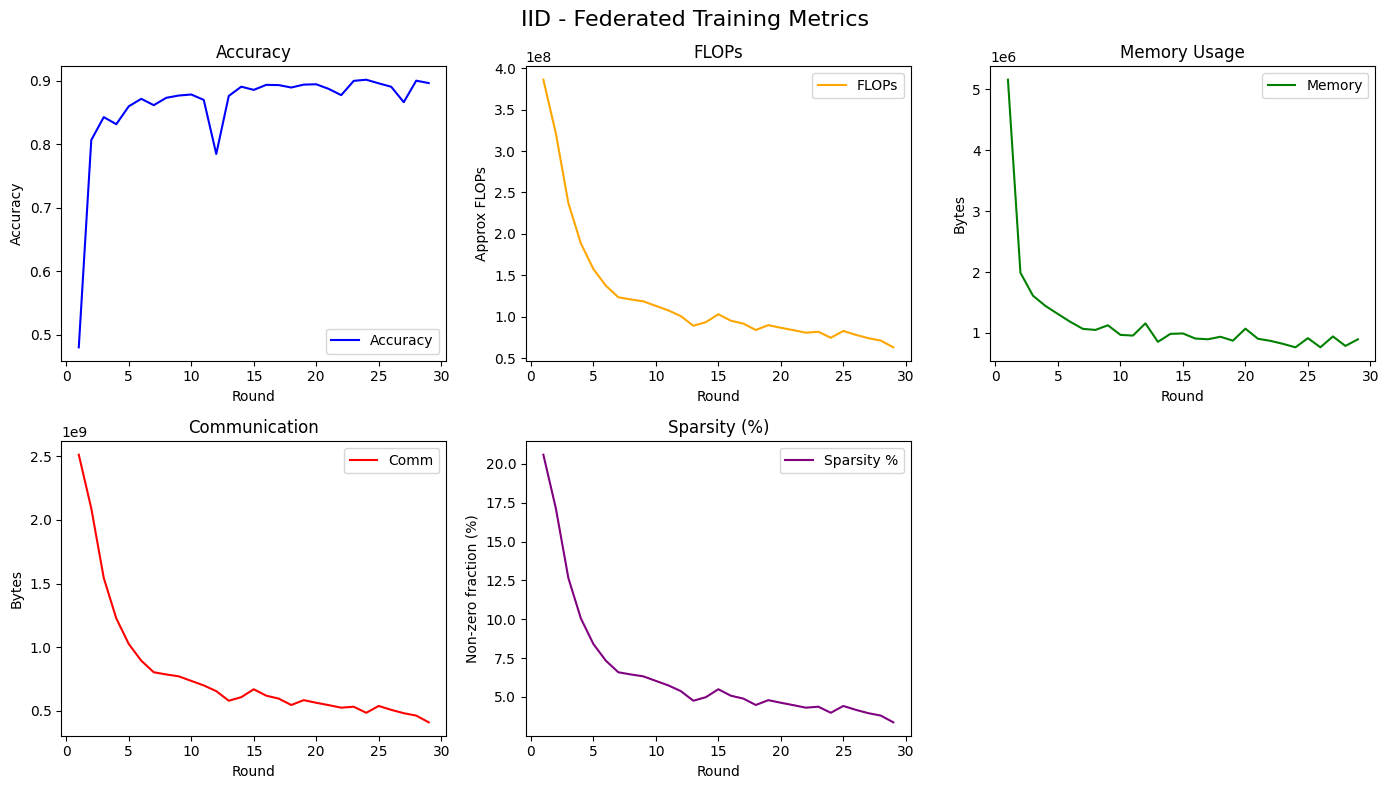

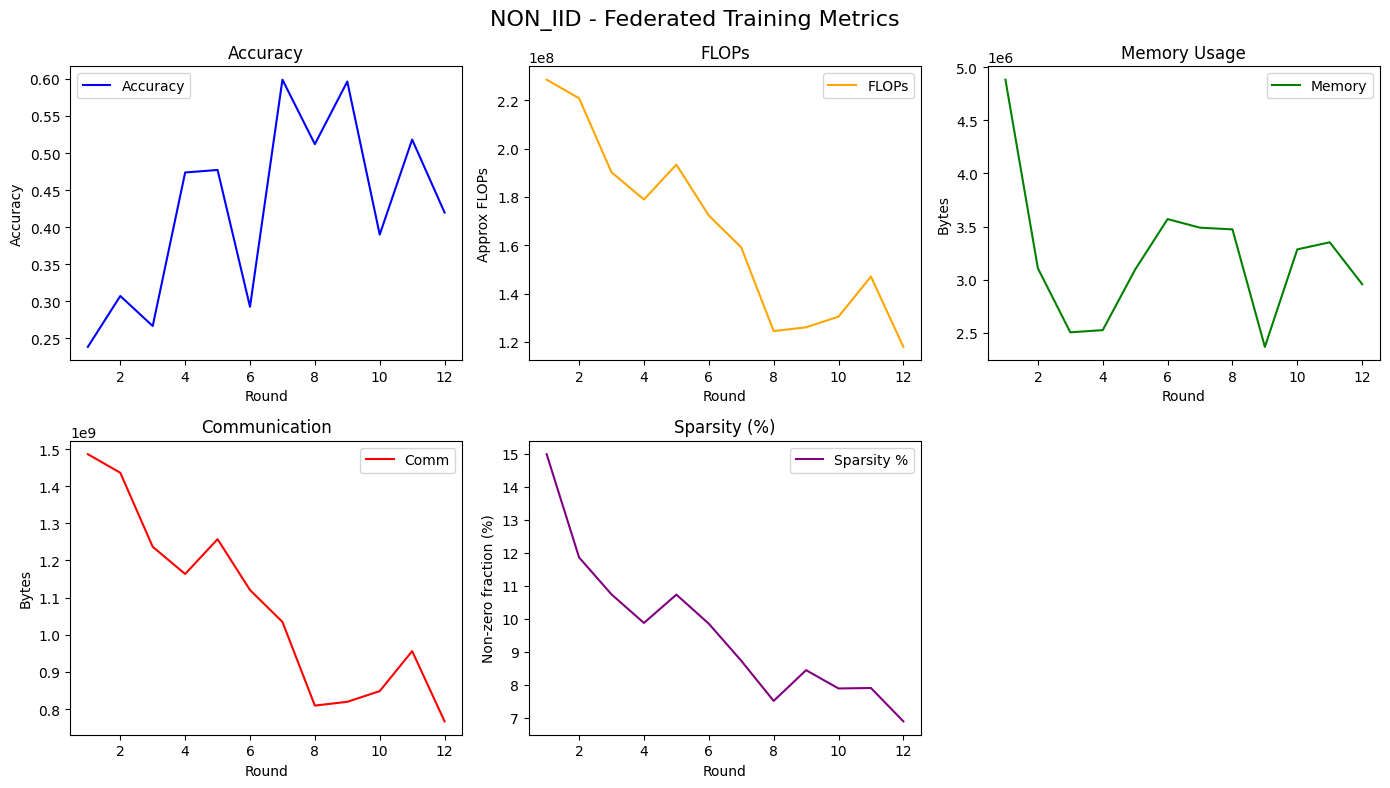

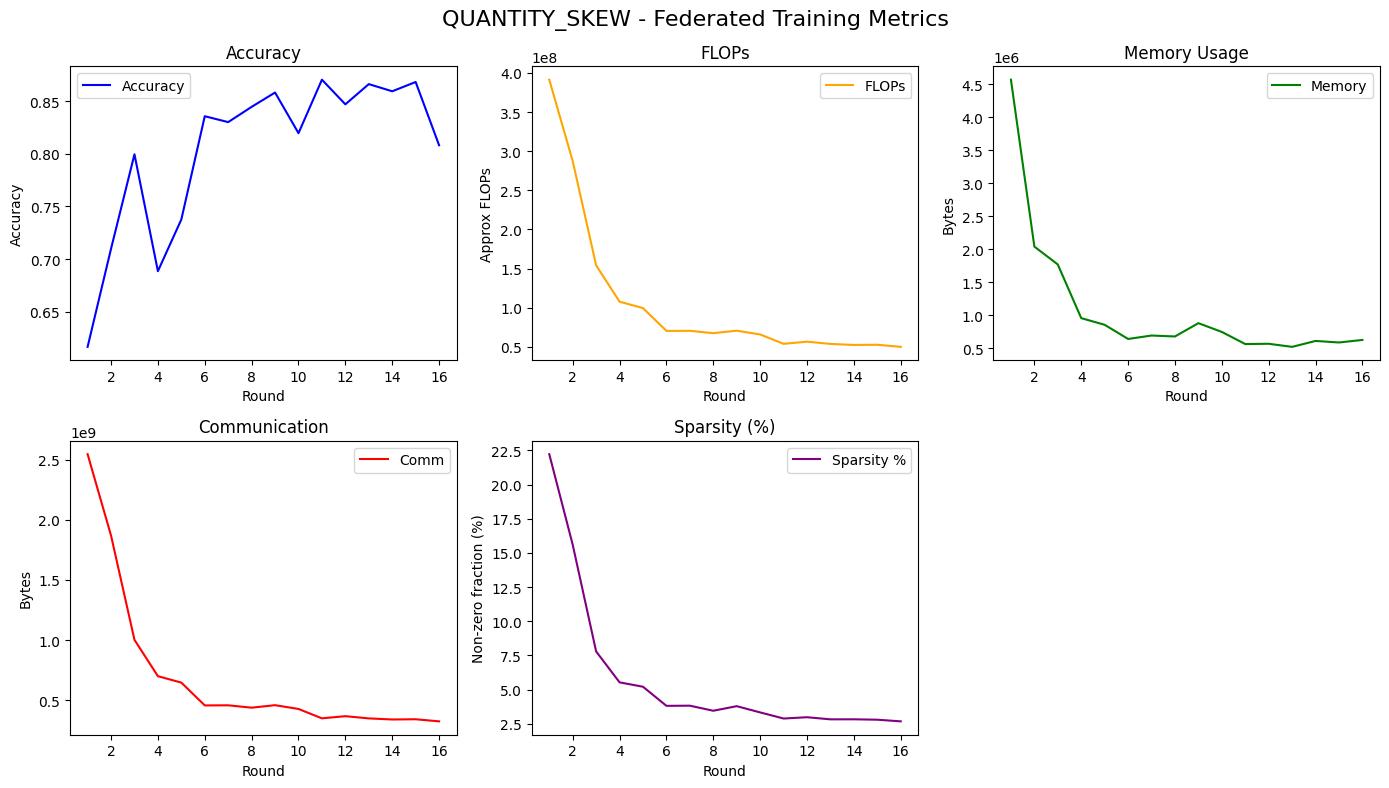

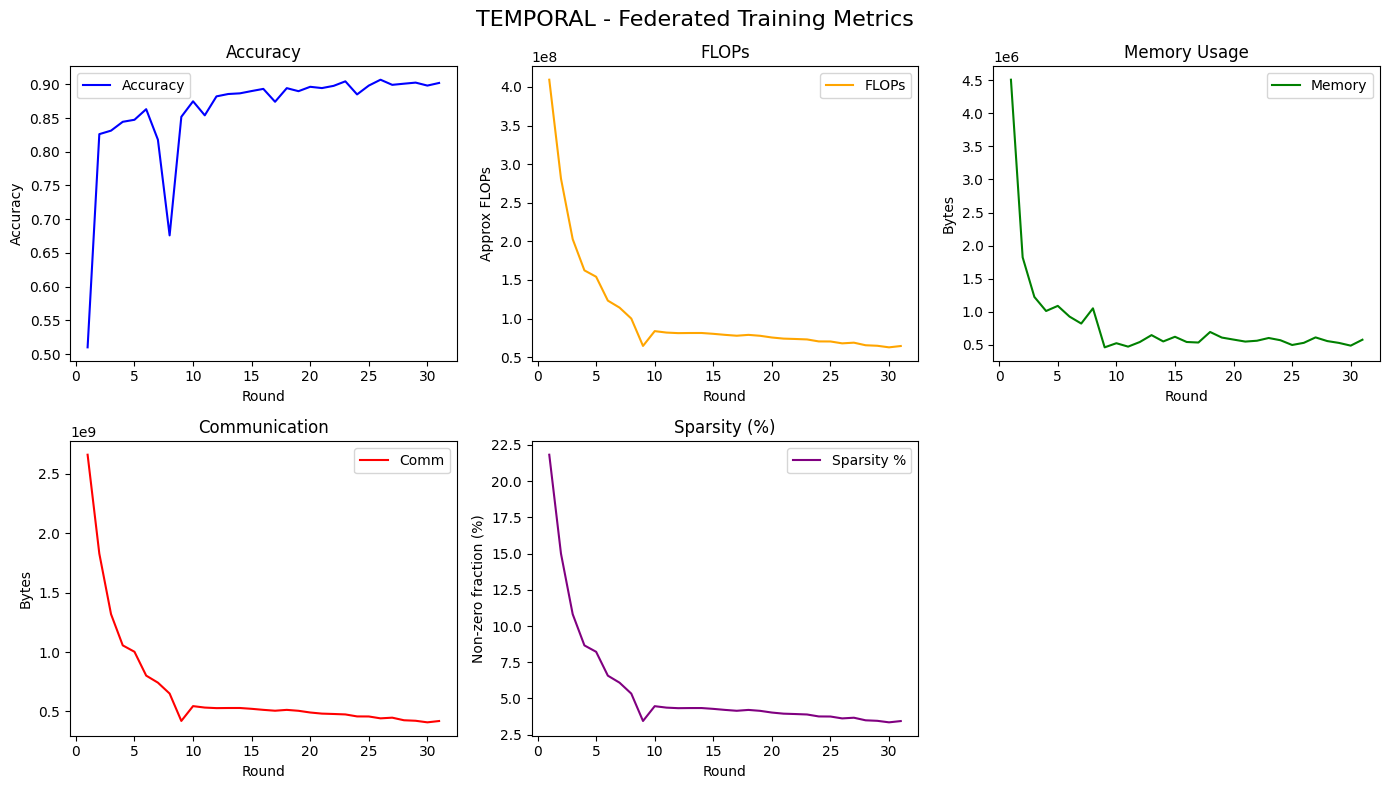

In [10]:
import matplotlib.pyplot as plt

for strategy, metrics in all_results.items():
    rounds_axis = range(1, len(metrics["acc"])+1)
    
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))
    fig.suptitle(f"{strategy.upper()} - Federated Training Metrics", fontsize=16)

    # 1) Accuracy
    axs[0, 0].plot(rounds_axis, metrics["acc"], label="Accuracy", color='blue')
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_xlabel("Round")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].legend()

    # 2) FLOPs
    axs[0, 1].plot(rounds_axis, metrics["flops"], label="FLOPs", color='orange')
    axs[0, 1].set_title("FLOPs")
    axs[0, 1].set_xlabel("Round")
    axs[0, 1].set_ylabel("Approx FLOPs")
    axs[0, 1].legend()

    # 3) Memory
    axs[0, 2].plot(rounds_axis, metrics["mem"], label="Memory", color='green')
    axs[0, 2].set_title("Memory Usage")
    axs[0, 2].set_xlabel("Round")
    axs[0, 2].set_ylabel("Bytes")
    axs[0, 2].legend()

    # 4) Communication
    axs[1, 0].plot(rounds_axis, metrics["comm"], label="Comm", color='red')
    axs[1, 0].set_title("Communication")
    axs[1, 0].set_xlabel("Round")
    axs[1, 0].set_ylabel("Bytes")
    axs[1, 0].legend()

    # 5) Sparsity
    if "sparsity" in metrics:
        sps = [s * 100 for s in metrics["sparsity"]]
        axs[1, 1].plot(rounds_axis, sps, label="Sparsity %", color='purple')
        axs[1, 1].set_title("Sparsity (%)")
        axs[1, 1].set_xlabel("Round")
        axs[1, 1].set_ylabel("Non-zero fraction (%)")
        axs[1, 1].legend()
    else:
        axs[1, 1].set_title("No Sparsity Data")
        axs[1, 1].axis('off')

    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()


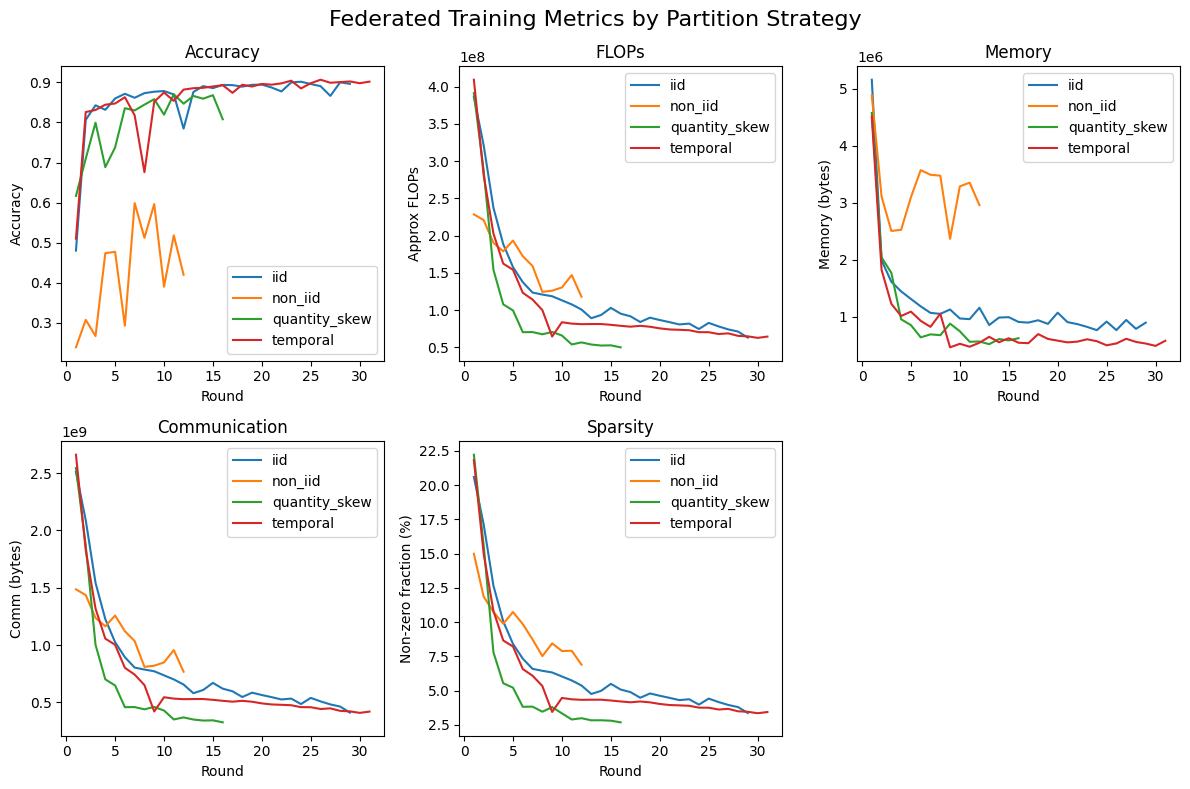

: 

In [ ]:
import matplotlib.pyplot as plt

def plot_all_partitions_in_one_figure(all_results):


    metric_keys = ["acc", "flops", "mem", "comm", "sparsity"]
    metric_titles = ["Accuracy", "FLOPs", "Memory", "Communication", "Sparsity"]
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle("Federated Training Metrics by Partition Strategy", fontsize=16)
    axs_flat = axs.ravel()

    for i, key in enumerate(metric_keys):
        ax = axs_flat[i]  
        ax.set_title(metric_titles[i])
        for strategy, data in all_results.items():
            if key not in data:
                continue 

            y_values = data[key]
            rounds_axis = range(1, len(y_values) + 1)

            if key == "sparsity":
                y_values = [val * 100 for val in y_values]
            ax.plot(rounds_axis, y_values, label=strategy)

        ax.set_xlabel("Round")
        if key == "acc":
            ax.set_ylabel("Accuracy")
        elif key == "flops":
            ax.set_ylabel("Approx FLOPs")
        elif key == "mem":
            ax.set_ylabel("Memory (bytes)")
        elif key == "comm":
            ax.set_ylabel("Comm (bytes)")
        elif key == "sparsity":
            ax.set_ylabel("Non-zero fraction (%)")

        ax.legend()

    axs_flat[-1].axis("off")

    plt.tight_layout()
    plt.show()
plot_all_partitions_in_one_figure(all_results)


In [5]:
num_clients = 10

partitions = {
    "iid":            iid_partition(trainset, num_clients),
    "non_iid":        non_iid_partition(trainset, num_clients=num_clients, num_shards=10),
    "dirichlet":      dirichlet_partition(trainset, num_clients=num_clients, alpha=0.5),
    "quantity_skew":  quantity_skew_partition(trainset, num_clients=num_clients),
    "temporal":       temporal_partition(trainset, num_clients=num_clients),
    "hybrid":         hybrid_partition(trainset, num_clients=num_clients, alpha=0.5),
}

print(f"We have {len(partitions)} partition strategies ready.")


We have 6 partition strategies ready.


c:\Users\la7tim\Desktop\Internship\FedTinyProp\utils\data_partition.py:19: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  labels = np.array(dataset.targets)


In [6]:

from models.tinyProp import TinyPropParams
tp_params = TinyPropParams(S_min=0.05, S_max=0.5, zeta=0.25, number_of_layers=2)

all_results = {}

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
rounds = 100
early_stop = 5

all_results = {}

for strategy, subsets in partitions.items():
    print(f"\n=== Federated Training with {strategy.upper()} partitions ===")
    
    try:
        global_model, acc_list, flops_list, mem_list, comm_list, sparsity_list = federated_training(
            client_datasets=subsets,
            model_name="fashionmnist",
            testset=testset,
            tinyprop_params=tp_params,
            aggregator_fn=weighted_aggregate,
            aggregator_kwargs=None,
            rounds=rounds,
            device=device,
            local_epochs=1,
            early_stopping_patience=early_stop,
        )
        
        all_results[strategy] = {
            "acc": acc_list,
            "flops": flops_list,
            "mem": mem_list,
            "comm": comm_list,
            "sparsity": sparsity_list
        }

    except RuntimeError as e:
        print(f"[ERROR - Skipping {strategy}] RuntimeError: {e}")
        continue



=== Federated Training with IID partitions ===

Round 1/100
Test Accuracy: 0.5241
[Compute] round_flops=373155035.70, [Mem] peak=5026768.0 bytes, [Comm] 2426451068.0 bytes, [Sparsity] 19.85%

Round 2/100
Test Accuracy: 0.7282
[Compute] round_flops=290554229.37, [Mem] peak=2310612.0 bytes, [Comm] 1889337012.0 bytes, [Sparsity] 15.46%

Round 3/100
Test Accuracy: 0.7701
[Compute] round_flops=215084323.51, [Mem] peak=1982232.0 bytes, [Comm] 1398591836.0 bytes, [Sparsity] 11.44%

Round 4/100
Test Accuracy: 0.8221
[Compute] round_flops=207642182.86, [Mem] peak=1843788.0 bytes, [Comm] 1350199108.0 bytes, [Sparsity] 11.04%

Round 5/100
Test Accuracy: 0.8279
[Compute] round_flops=190006612.20, [Mem] peak=1864172.0 bytes, [Comm] 1235523316.0 bytes, [Sparsity] 10.11%

Round 6/100
Test Accuracy: 0.8446
[Compute] round_flops=168410407.77, [Mem] peak=1818736.0 bytes, [Comm] 1095093392.0 bytes, [Sparsity] 8.96%

Round 7/100
Test Accuracy: 0.8452
[Compute] round_flops=156725543.05, [Mem] peak=1664128

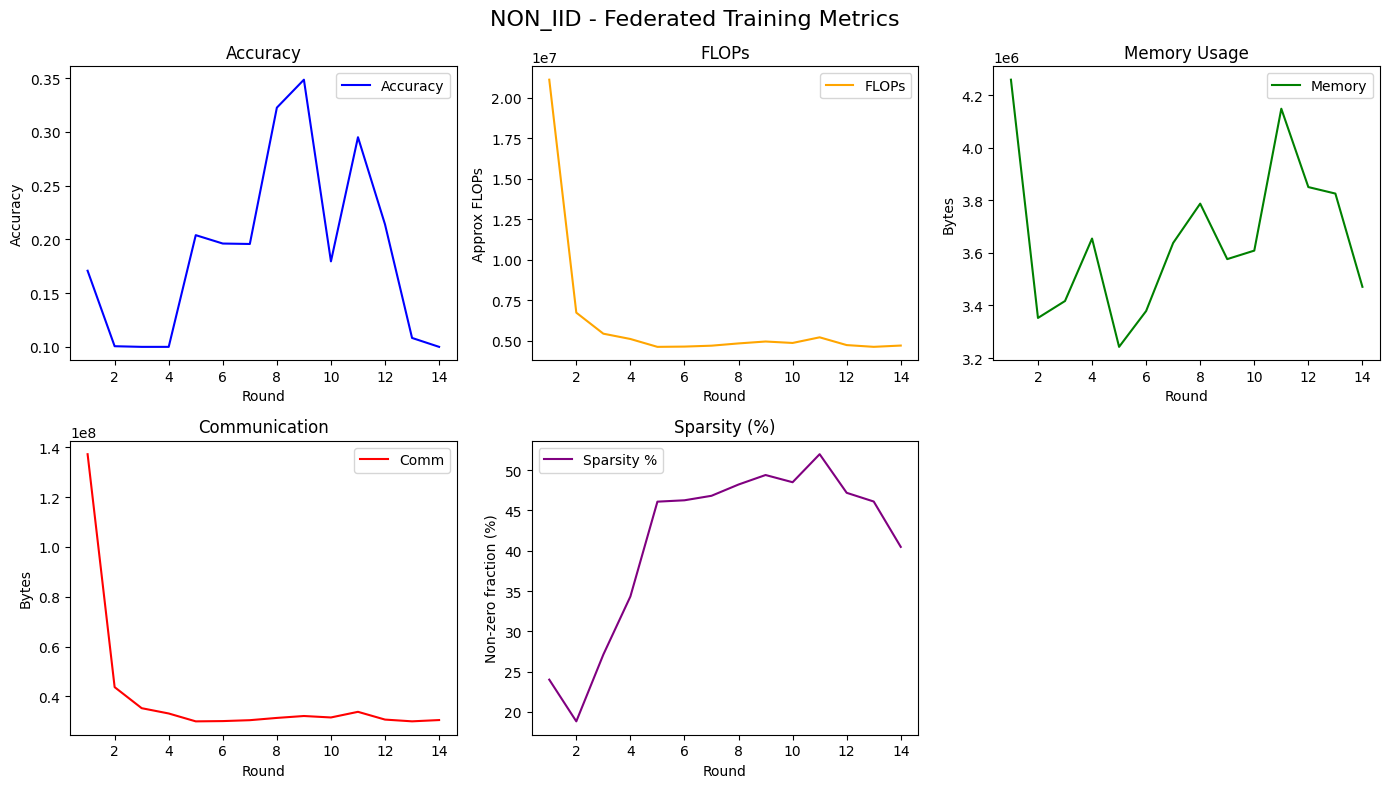

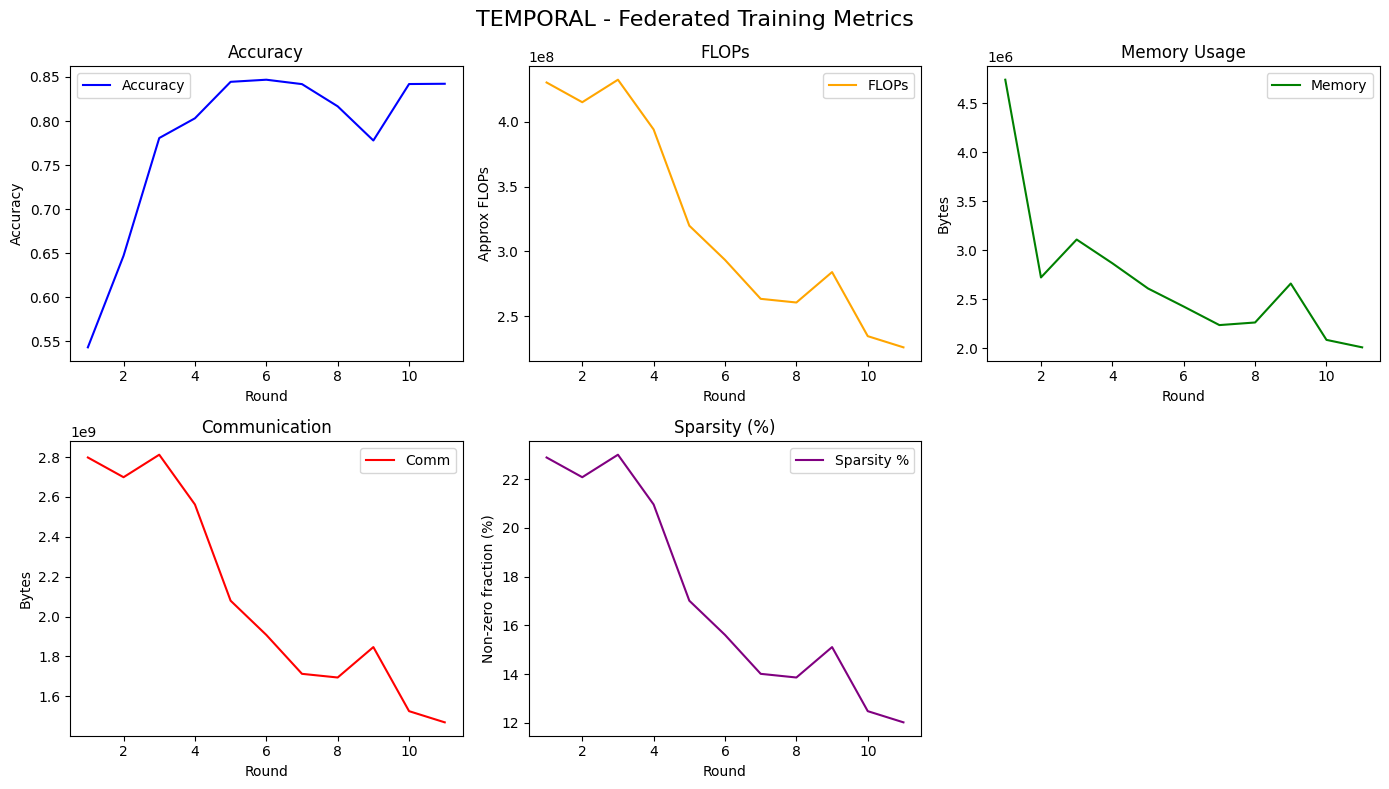

In [9]:
import matplotlib.pyplot as plt

for strategy, metrics in all_results.items():
    rounds_axis = range(1, len(metrics["acc"])+1)
    
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))
    fig.suptitle(f"{strategy.upper()} - Federated Training Metrics", fontsize=16)

    # 1) Accuracy
    axs[0, 0].plot(rounds_axis, metrics["acc"], label="Accuracy", color='blue')
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_xlabel("Round")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].legend()

    # 2) FLOPs
    axs[0, 1].plot(rounds_axis, metrics["flops"], label="FLOPs", color='orange')
    axs[0, 1].set_title("FLOPs")
    axs[0, 1].set_xlabel("Round")
    axs[0, 1].set_ylabel("Approx FLOPs")
    axs[0, 1].legend()

    # 3) Memory
    axs[0, 2].plot(rounds_axis, metrics["mem"], label="Memory", color='green')
    axs[0, 2].set_title("Memory Usage")
    axs[0, 2].set_xlabel("Round")
    axs[0, 2].set_ylabel("Bytes")
    axs[0, 2].legend()

    # 4) Communication
    axs[1, 0].plot(rounds_axis, metrics["comm"], label="Comm", color='red')
    axs[1, 0].set_title("Communication")
    axs[1, 0].set_xlabel("Round")
    axs[1, 0].set_ylabel("Bytes")
    axs[1, 0].legend()

    # 5) Sparsity
    if "sparsity" in metrics:
        sps = [s * 100 for s in metrics["sparsity"]]
        axs[1, 1].plot(rounds_axis, sps, label="Sparsity %", color='purple')
        axs[1, 1].set_title("Sparsity (%)")
        axs[1, 1].set_xlabel("Round")
        axs[1, 1].set_ylabel("Non-zero fraction (%)")
        axs[1, 1].legend()
    else:
        axs[1, 1].set_title("No Sparsity Data")
        axs[1, 1].axis('off')

    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()
